In [1]:
#--- ref: goo.gl/r3HQNE
#--- ref: Jupyter / IPython: After editing a module, changes are not effective without kernel restart
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [6]:
import mfnn_factory as fac
import mfnn_graph as graph

#--- create data sets
training_data, validation_data, test_data = fac.create_np_data_sets()
inputs, targets = training_data

#--- create neural network
mfnn = fac.create_mfnn(input_size=inputs.shape[2])
mfnn.summary()

#--- train the neural network
training_losses, validation_losses = mfnn.fit(inputs, targets, 
                              learning_rate=0.1, epochs=600, batch_size=128, 
                              validation_data=validation_data)

---------------------------------------
Neural network layers (inputs, outputs)
---------------------------------------
Dense: (58, 32)
Sigmoid Activation: (32, 32)
Dense: (32, 1)
Activation(Default Linear): (1, 1)
---------------------------------------


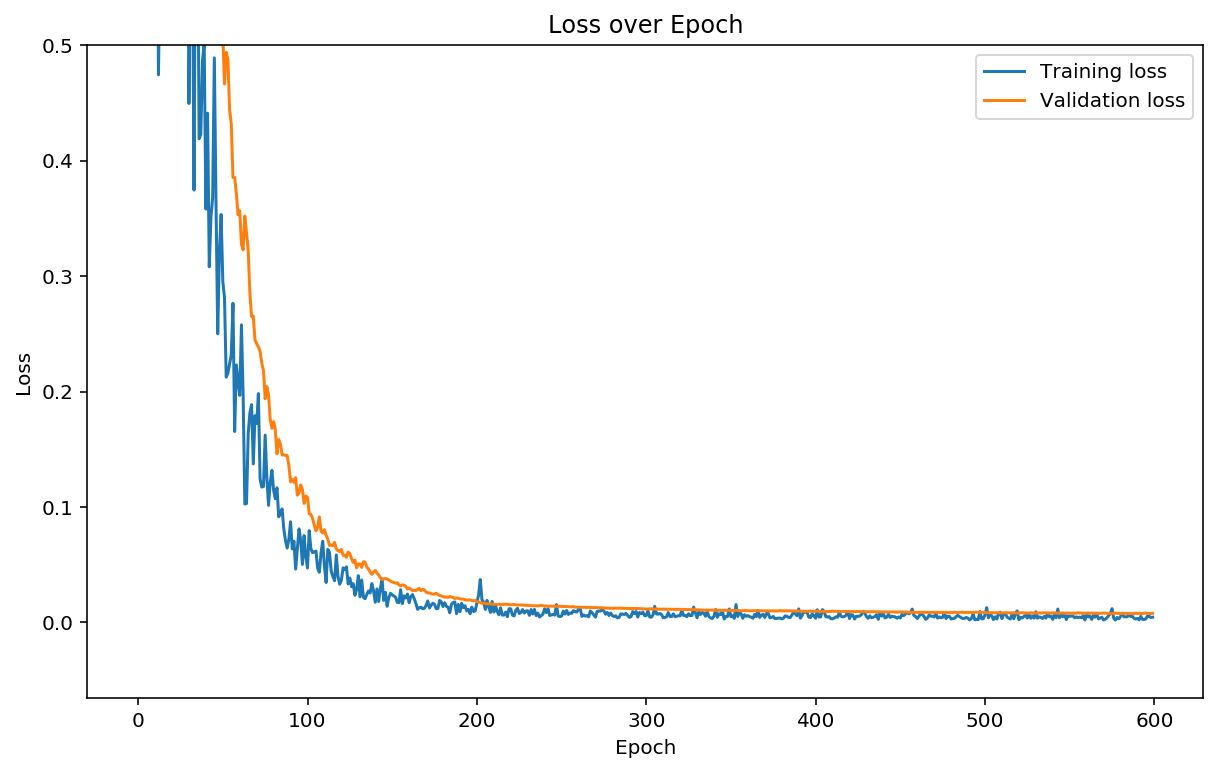

In [7]:
#--- display the training loss over epoch
graph.plot_losses(training_losses, validation_losses)


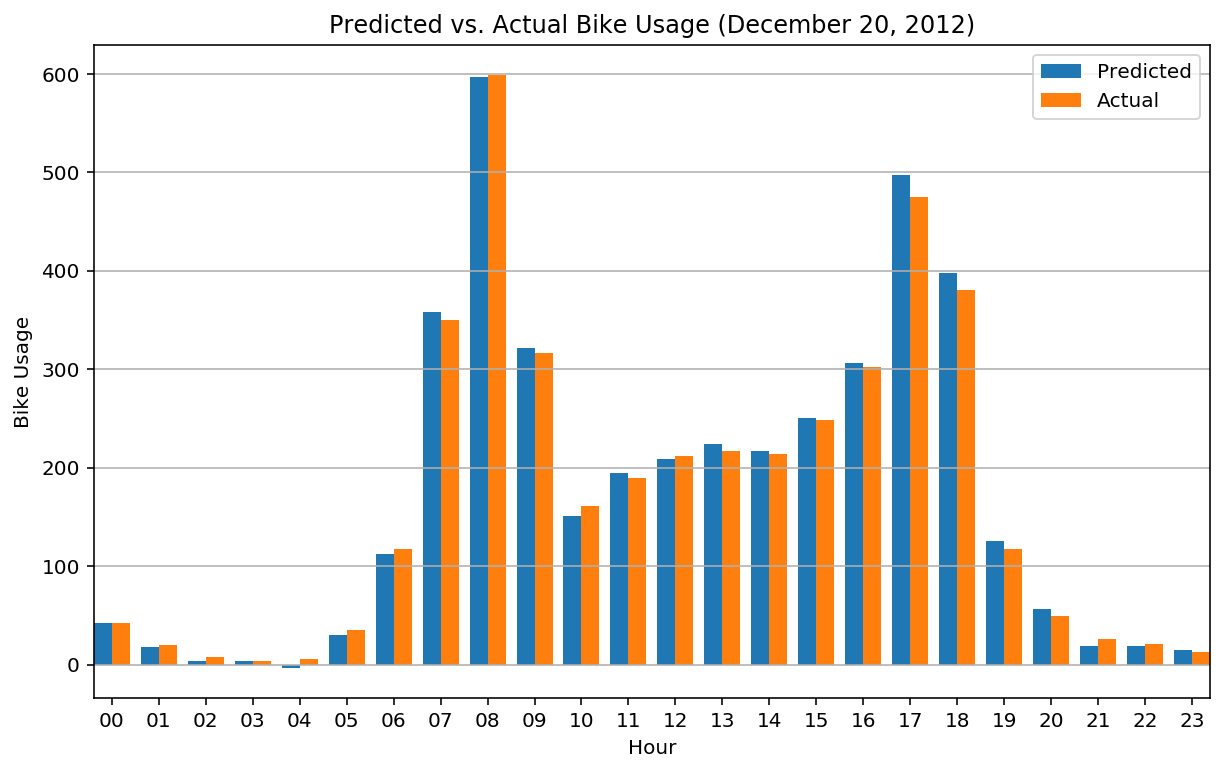

In [8]:
#--- display predicted vs actual usage for 24 hours in a bar chart
test_features, test_targets_z, datetimes, mean, std = test_data

#--- predict bike usage
predictions_z = mfnn.predict_on_batch(test_features)

#--- convert predictions from z_score to a raw value
predicted_values = predictions_z * std + mean
actual_values    = test_targets_z * std + mean

#--- plot the predictions against the actual values for a 24 hour period
graph.plot_predictions_24hr(predicted_values, actual_values, datetimes, "2012-12-20")

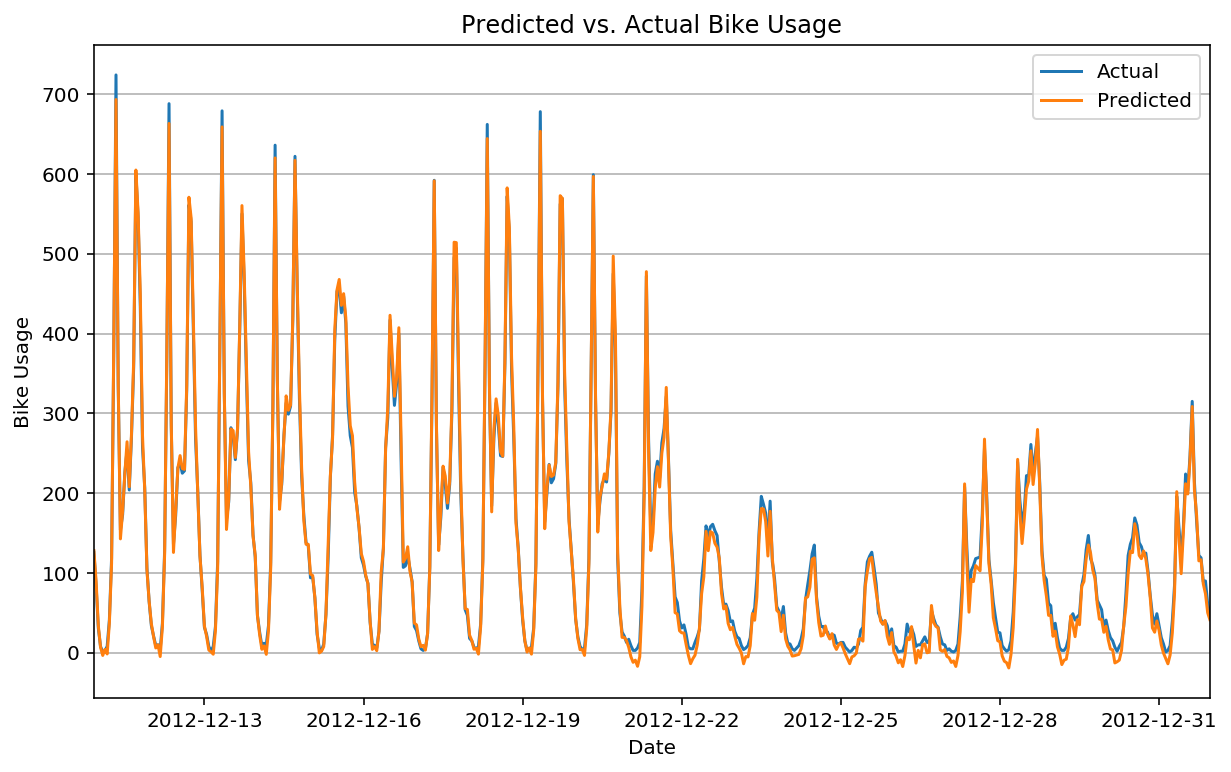

In [20]:
#--- display predicted vs actual usage for all data on a line chart
graph.plot_predictions(predicted_values, actual_values, datetimes)